<a href="https://colab.research.google.com/github/juno2856/test/blob/master/Class_1_20220411.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

print(sys.version)

3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]


In [ ]:
! pip install tensorflow

     |████████████████████████████████| 462 kB 15.2 MB/s 


In [ ]:
import tensorflow as tf

print(tf.__version__)

2.8.0


In [ ]:
tf.executing_eagerly()

True

In [ ]:
from tensorflow import keras
import numpy as np

In [ ]:
data_set = np.loadtxt('/root/ThoraricSurgery.csv', delimiter = ',')
data_set.shape
type(data_set)

numpy.ndarray

In [ ]:
cd /root

/root


In [ ]:
!mkdir data

In [ ]:
from google.colab import files
file_uploaded = files.upload()

Saving ThoraricSurgery.csv to ThoraricSurgery.csv


In [ ]:
data_set

array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

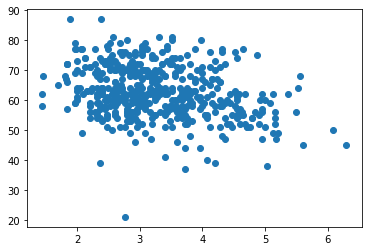

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data_set[:,2], data_set[:,-2])
plt.show()

In [ ]:
X = data_set[:, :17]
Y = data_set[:, 17]
Y
X[:10, :6]

array([[293.  ,   1.  ,   3.8 ,   2.8 ,   0.  ,   0.  ],
       [  1.  ,   2.  ,   2.88,   2.16,   1.  ,   0.  ],
       [  8.  ,   2.  ,   3.19,   2.5 ,   1.  ,   0.  ],
       [ 14.  ,   2.  ,   3.98,   3.06,   2.  ,   0.  ],
       [ 17.  ,   2.  ,   2.21,   1.88,   0.  ,   0.  ],
       [ 18.  ,   2.  ,   2.96,   1.67,   0.  ,   0.  ],
       [ 35.  ,   2.  ,   2.76,   2.2 ,   1.  ,   0.  ],
       [ 42.  ,   2.  ,   3.24,   2.52,   1.  ,   0.  ],
       [ 65.  ,   2.  ,   3.15,   2.76,   1.  ,   0.  ],
       [111.  ,   2.  ,   4.48,   4.2 ,   0.  ,   0.  ]])

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Dense(30,input_dim = 17, activation = 'relu'))#노드 17개 * 30 + 30
#model.add(keras.layers.Dense(12, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid')) #노드 30 ->> 1 / bias output 1

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                540       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 1)                 13        
                                                                 
Total params: 925
Trainable params: 925
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# parameter estimation, w ,b 값 찾기

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics= 'accuracy')  # w,b 차기 방식을 정의 해줌
              
model.fit(X,Y, epochs = 100, batch_size = 50) 

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 77.1660 - accuracy: 0.1489
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 63.0598 - accuracy: 0.1489
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 49.1409 - accuracy: 0.1489
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 35.6912 - accuracy: 0.1511
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 21.8422 - accuracy: 0.1511
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 8.4949 - accuracy: 0.2234
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 2.3942 - accuracy: 0.5723
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 1.9326 - accuracy: 0.7277
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 1.9443 - accuracy: 0.7766
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 1.8167 - accuracy: 0.7830
Epoc

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

In [ ]:
layer = layers.Dense(3)
layer.weights  # Empty
layer

In [ ]:
x = tf.ones((1, 4))
y = layer(x)
layer.weights 

[<tf.Variable 'dense_11/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 0.6103308 ,  0.3356638 , -0.56524086],
        [-0.4137584 ,  0.09654546,  0.7110156 ],
        [ 0.92423785, -0.16035396, -0.62928164],
        [ 0.19590819, -0.1841613 ,  0.4178722 ]], dtype=float32)>,
 <tf.Variable 'dense_11/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [ ]:
x = tf.ones((1, 4))
x

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[1., 1., 1., 1.]], dtype=float32)>

In [ ]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)
y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-0.31375545,  1.1782014 ,  1.4054091 , -0.4451328 ],
       [-0.31375545,  1.1782014 ,  1.4054091 , -0.4451328 ],
       [-0.31375545,  1.1782014 ,  1.4054091 , -0.4451328 ]],
      dtype=float32)>

In [2]:
git branch

SyntaxError: ignored